In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf 
import os
import matplotlib.pyplot as plt


In [2]:
os.chdir(r'C://Users//фора//Downloads')

In [3]:
df = pd.read_csv("dataset_temperature_2.csv")

In [4]:
df=df.set_index("Unnamed: 0")

x=df.iloc[:-1,-14:]
y=df.iloc[1:,:10]

In [5]:
df

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,...,c1_23l,c1_32h,c1_32l,c2_off,c2_16h,c2_16l,c2_23h,c2_23l,c2_32h,c2_32l
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-02-16 13:44:23,21,21,22,22,22,21,22,23,22,22,...,1,0,0,0,0,0,0,1,0,0
2021-02-16 13:54:23,21,21,22,22,22,22,22,23,22,22,...,1,0,0,0,0,0,0,1,0,0
2021-02-16 14:04:23,22,22,22,22,23,22,22,23,22,22,...,1,0,0,0,0,0,0,1,0,0
2021-02-16 14:14:23,23,22,22,23,23,22,22,23,23,23,...,1,0,0,0,0,0,0,1,0,0
2021-02-16 14:24:23,23,22,23,23,23,23,23,23,23,23,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12 10:14:46,19,18,18,18,19,18,18,19,18,18,...,0,1,0,0,0,0,0,0,1,0
2021-04-12 10:24:46,19,18,18,18,19,18,18,19,18,18,...,0,1,0,0,0,0,0,0,1,0
2021-04-12 10:34:46,19,18,18,18,19,18,18,19,18,18,...,0,1,0,0,0,0,0,0,1,0


In [6]:
scaler_x=StandardScaler()
scaler_x.fit(x)


StandardScaler()

In [7]:

X_trans = scaler_x.transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y,shuffle=False)

In [8]:
X_trans

array([[-0.55245119, -0.20475559, -0.38235179, ...,  2.37276917,
        -0.29100336, -0.41098653],
       [-0.55245119, -0.20475559, -0.38235179, ...,  2.37276917,
        -0.29100336, -0.41098653],
       [-0.55245119, -0.20475559, -0.38235179, ...,  2.37276917,
        -0.29100336, -0.41098653],
       ...,
       [-0.55245119, -0.20475559, -0.38235179, ..., -0.4214485 ,
         3.43638648, -0.41098653],
       [-0.55245119, -0.20475559, -0.38235179, ..., -0.4214485 ,
         3.43638648, -0.41098653],
       [-0.55245119, -0.20475559, -0.38235179, ..., -0.4214485 ,
         3.43638648, -0.41098653]])

In [9]:

model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mse'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 503.4361 - mse: 503.4361 - val_loss: 495.8509 - val_mse: 495.8509 - 529ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 502.8477 - mse: 502.8477 - val_loss: 495.8397 - val_mse: 495.8397 - 175ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 502.8412 - mse: 502.8412 - val_loss: 4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1920      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
173/173 - 1s - loss: 23.2262 - mae: 23.2262 - val_loss: 22.9032 - val_mae: 22.9032 - 561ms/epoch - 3ms/step
Epoch 2/50
173/173 - 0s - loss: 22.9415 - mae: 22.9415 - val_loss: 22.6034 - val_mae: 22.6034 - 201ms/epoch - 1ms/step
Epoch 3/50
173/173 - 0s - loss: 22.6384 - mae: 22.6384 - val_loss: 22.2971 -

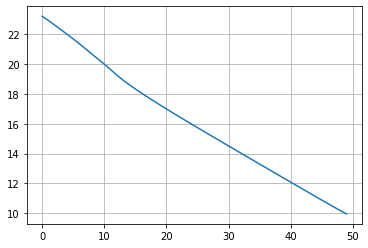

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='softmax'))
model.add(Dense(10, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=50,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1920      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 505.3864 - mae: 22.3960 - val_loss: 495.9336 - val_mae: 22.1542 - 539ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 502.8990 - mae: 22.3406 - val_loss: 495.8734 - val_mae: 22.1528 - 198ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 502.8669 - mae: 22.3399 - val_loss: 495.

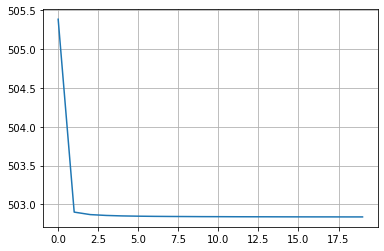

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='tanh'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1920      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 22.6177 - mae: 22.6177 - val_loss: 22.1926 - val_mae: 22.1926 - 547ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 22.3522 - mae: 22.3522 - val_loss: 22.1554 - val_mae: 22.1554 - 196ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 22.3409 - mae: 22.3409 - val_loss: 22.1525 -

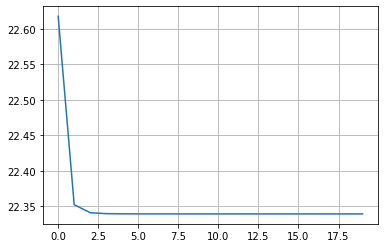

In [12]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1920      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 469.1307 - mse: 469.1307 - val_loss: 305.8533 - val_mse: 305.8533 - 554ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 132.1652 - mse: 132.1652 - val_loss: 16.1301 - val_mse: 16.1301 - 196ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 3.7393 - mse: 3.7393 - val_loss: 1.163

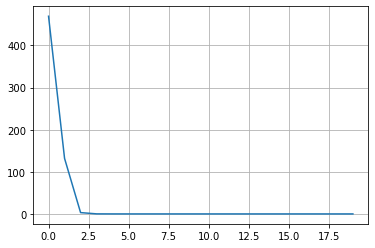

In [13]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='selu'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1920      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 6.6978 - mae: 6.6978 - val_loss: 0.5898 - val_mae: 0.5898 - 568ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 0.5324 - mae: 0.5324 - val_loss: 0.5657 - val_mae: 0.5657 - 218ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 0.5337 - mae: 0.5337 - val_loss: 0.5698 - val_mae: 0

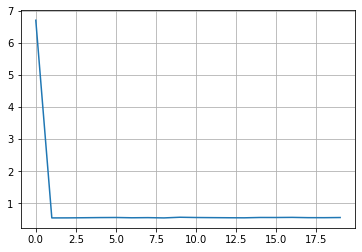

In [14]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1920      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 22.4744 - mae: 22.4744 - val_loss: 22.1751 - val_mae: 22.1751 - 659ms/epoch - 4ms/step
Epoch 2/20
173/173 - 0s - loss: 22.3515 - mae: 22.3515 - val_loss: 22.1582 - val_mae: 22.1582 - 198ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 22.3433 - mae: 22.3433 - val_loss: 22.1545 -

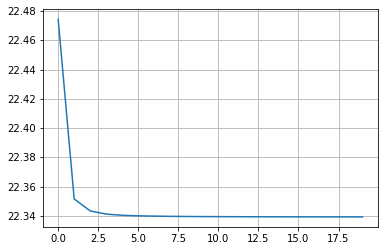

In [15]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               1920      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 514.0175 - mse: 514.0175 - val_loss: 496.3172 - val_mse: 496.3172 - 611ms/epoch - 4ms/step
Epoch 2/20
173/173 - 0s - loss: 503.0806 - mse: 503.0806 - val_loss: 495.9525 - val_mse: 495.9525 - 207ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 502.9174 - mse: 502.9174 - val_loss:

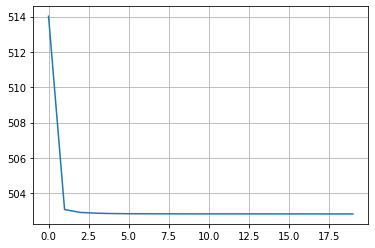

In [16]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='selu'))
model.add(Dense(10, activation='tanh'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

In [17]:
scaler_x2=MinMaxScaler()
scaler_x2.fit(x)

X_trans = scaler_x2.transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y,shuffle=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1920      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 22.4727 - mae: 22.4727 - val_loss: 22.1752 - val_mae: 22.1752 - 543ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 22.3519 - mae: 22.3519 - val_loss: 22.1589 - val_mae: 22.1589 - 200ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 22.3440 - mae: 22.3440 - val_loss: 22.1552 -

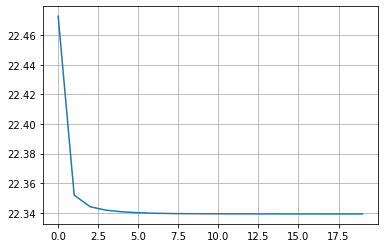

In [18]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='softmax'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               1920      
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,826
Trainable params: 10,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 22.8697 - mae: 22.8697 - val_loss: 22.3879 - val_mae: 22.3879 - 509ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 22.4648 - mae: 22.4648 - val_loss: 22.2230 - val_mae: 22.2230 - 191ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 22.3852 - mae: 22.3852 - val_loss: 22.1869 -

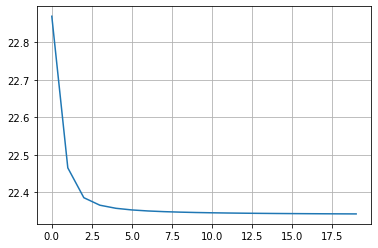

In [19]:
model = Sequential()
model.add(Dense(128, input_dim=14, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mae'])
fit = model.fit(X_trans, y, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

In [20]:
y

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10
Unnamed: 0,,,,,,,,,,
2021-02-16 13:54:23,21,21,22,22,22,22,22,23,22,22
2021-02-16 14:04:23,22,22,22,22,23,22,22,23,22,22
2021-02-16 14:14:23,23,22,22,23,23,22,22,23,23,23
2021-02-16 14:24:23,23,22,23,23,23,23,23,23,23,23
2021-02-16 14:34:23,23,23,23,23,24,23,23,24,23,23
...,...,...,...,...,...,...,...,...,...,...
2021-04-12 10:14:46,19,18,18,18,19,18,18,19,18,18
2021-04-12 10:24:46,19,18,18,18,19,18,18,19,18,18
2021-04-12 10:34:46,19,18,18,18,19,18,18,19,18,18


In [21]:
x=df.iloc[:-1,-14:]
y=df.iloc[1:,:10]

In [22]:
x

,c1_off,c1_16h,c1_16l,c1_23h,c1_23l,c1_32h,c1_32l,c2_off,c2_16h,c2_16l,c2_23h,c2_23l,c2_32h,c2_32l
Unnamed: 0,,,,,,,,,,,,,,
2021-02-16 13:44:23,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2021-02-16 13:54:23,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2021-02-16 14:04:23,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2021-02-16 14:14:23,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2021-02-16 14:24:23,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12 10:04:46,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2021-04-12 10:14:46,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2021-04-12 10:24:46,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [23]:
x = x.iloc[:,:-4]


In [24]:
x

,c1_off,c1_16h,c1_16l,c1_23h,c1_23l,c1_32h,c1_32l,c2_off,c2_16h,c2_16l
Unnamed: 0,,,,,,,,,,
2021-02-16 13:44:23,0,0,0,0,1,0,0,0,0,0
2021-02-16 13:54:23,0,0,0,0,1,0,0,0,0,0
2021-02-16 14:04:23,0,0,0,0,1,0,0,0,0,0
2021-02-16 14:14:23,0,0,0,0,1,0,0,0,0,0
2021-02-16 14:24:23,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-04-12 10:04:46,0,0,0,0,0,1,0,0,0,0
2021-04-12 10:14:46,0,0,0,0,0,1,0,0,0,0
2021-04-12 10:24:46,0,0,0,0,0,1,0,0,0,0


# 2nd task

In [25]:
scaler_y=StandardScaler()
scaler_y.fit(y)

StandardScaler()

In [26]:

Y_trans = scaler_y.transform(y)
Y_train, Y_test, x_train, x_test = train_test_split(Y_trans, x,shuffle=False)

In [27]:
Y_trans

array([[-1.2183859 , -0.91184958, -0.54134991, ..., -0.43313004,
        -0.69140067, -0.7157459 ],
       [-0.71797514, -0.41396736, -0.54134991, ..., -0.43313004,
        -0.69140067, -0.7157459 ],
       [-0.21756439, -0.41396736, -0.54134991, ..., -0.43313004,
        -0.20353107, -0.22258637],
       ...,
       [-2.21920741, -2.40549625, -2.52387462, ..., -2.42037339,
        -2.64287905, -2.68838403],
       [-2.21920741, -2.40549625, -2.52387462, ..., -2.42037339,
        -2.64287905, -2.68838403],
       [-2.21920741, -2.40549625, -2.52387462, ..., -2.42037339,
        -2.64287905, -2.68838403]])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1408      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,314
Trainable params: 10,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 0.2082 - mse: 0.2082 - val_loss: 0.1514 - val_mse: 0.1514 - 503ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 0.1490 - mse: 0.1490 - val_loss: 0.1298 - val_mse: 0.1298 - 199ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 0.1354 - mse: 0.1354 - val_loss: 0.1219 - val_mse: 

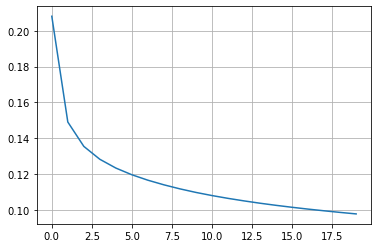

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mse'])
fit = model.fit(Y_trans, x, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1408      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,314
Trainable params: 10,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
173/173 - 1s - loss: 0.1356 - mae: 0.1356 - val_loss: 0.1205 - val_mae: 0.1205 - 559ms/epoch - 3ms/step
Epoch 2/20
173/173 - 0s - loss: 0.1116 - mae: 0.1116 - val_loss: 0.1201 - val_mae: 0.1201 - 196ms/epoch - 1ms/step
Epoch 3/20
173/173 - 0s - loss: 0.1111 - mae: 0.1111 - val_loss: 0.1200 - val_mae: 

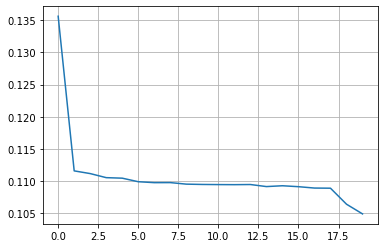

In [29]:
model = Sequential()
model.add(Dense(128, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
fit = model.fit(Y_trans, x, epochs=20,  verbose=2, validation_split=0.3)

plt.plot(fit.history['loss'])
plt.grid(True)
plt.show()

print(fit)